In [4]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_df = pd.read_pickle("train.pkl")
test_df = pd.read_pickle("test.pkl")


In [6]:
train_df.head()



,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [5]:
cla=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))


In [6]:
cla

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
18071,0.818807,0.458716,0.048165,0.011468,0.000000,0.009174,0.011468,0.004587,0.004587,0.018349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73936,0.941538,0.750769,0.000000,0.049231,0.215385,0.255385,0.258462,0.249231,0.240000,0.246154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76185,0.000000,0.016287,0.110749,0.146580,0.224756,0.399023,0.467427,0.504886,0.526059,0.597720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81070,0.997028,0.716196,0.352155,0.090639,0.000000,0.084695,0.104012,0.081724,0.068351,0.069837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84192,0.783961,0.705401,0.595745,0.469722,0.309329,0.183306,0.091653,0.042553,0.019640,0.060556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


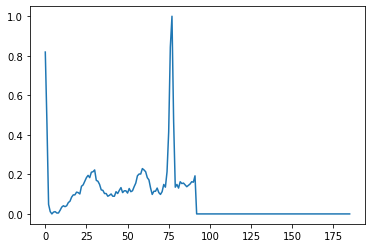

In [7]:
plt.plot(cla.iloc[0,:186])

In [8]:
#adding Gaussian noise - becouse signal always is 'noisy' and we would like to work with date simlar to real signal
def add_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)



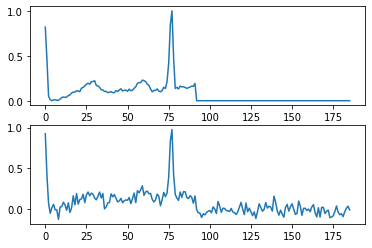

In [9]:
tempo = cla.iloc[0,:186]
beat = add_noise(tempo)

plt.subplot(2,1,1)
plt.plot(cla.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(beat)

plt.show()


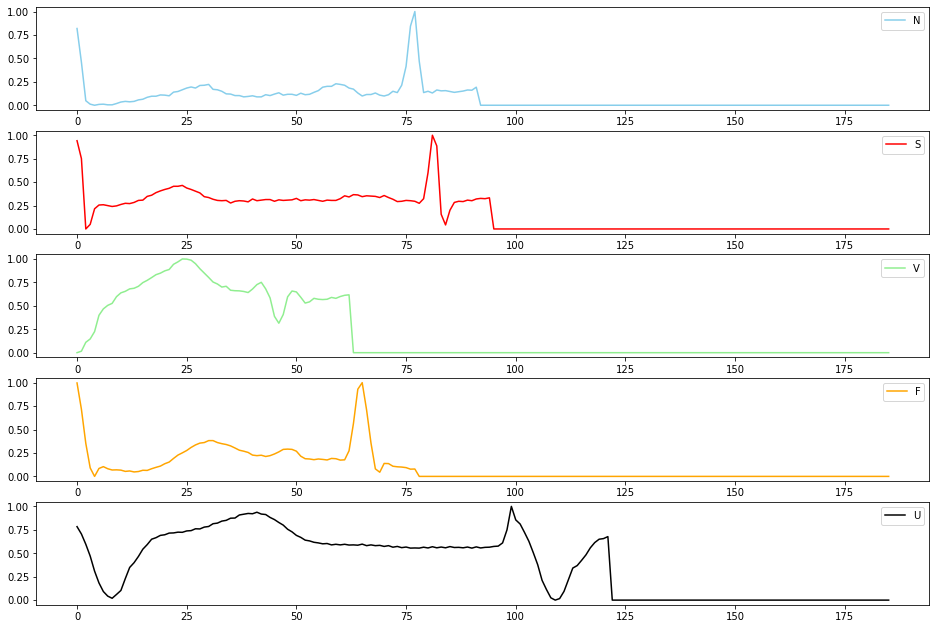

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(5, 1, figsize=(16, 11))
#now we would see diffrencces between types of heart beat
leg = iter(['N', 'S', 'V', 'F', 'U'])
colors = iter(['skyblue', 'red', 'lightgreen', 'orange', 'black'])
for i, ax in enumerate(axes.flatten()):
    ax.plot(cla.iloc[i, :186].T, color=next(colors))
    ax.legend(next(leg))
plt.show()
plt.savefig('heart beat sample.PNG')
